<a href="https://colab.research.google.com/github/eloigil/ai-course/blob/master/10-linear-algebra-for-ml/07_moore_penrose_pseudoinverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

np.set_printoptions(suppress=True)

In [3]:
A = np.array([[2,3],[5,7],[11,13]])
print(A)

[[ 2  3]
 [ 5  7]
 [11 13]]


In [4]:
U,D,V = np.linalg.svd(A)
print('U')
print(U)
print('D')
print(D)
print('V')
print(V)

U
[[-0.18499741 -0.47276624 -0.86154979]
 [-0.44249308 -0.74271297  0.50257071]
 [-0.87748267  0.4742041  -0.07179582]]
D
[19.40321383  0.71783924]
V
[[-0.63055377 -0.77614557]
 [ 0.77614557 -0.63055377]]


In [5]:
D_pseud = np.zeros((A.shape[0], A.shape[1])).T
print(D_pseud)

[[0. 0. 0.]
 [0. 0. 0.]]


In [6]:
print('Values to replace in D_pseud')
print(D_pseud[:D.shape[0], :D.shape[0]])

Values to replace in D_pseud
[[0. 0.]
 [0. 0.]]


In [7]:
print('Values to put in D_pseud')
print(np.linalg.inv(np.diag(D)))

Values to put in D_pseud
[[0.05153785 0.        ]
 [0.         1.39306957]]


In [8]:
print('D_pseud')
D_pseud[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_pseud)

D_pseud
[[0.05153785 0.         0.        ]
 [0.         1.39306957 0.        ]]


In [9]:
A_pseud = V.T.dot(D_pseud).dot(U.T)
print(A_pseud)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [10]:
A_pseud_calc = np.linalg.pinv(A)
print(A_pseud_calc)

[[-0.50515464 -0.78865979  0.54123711]
 [ 0.42268041  0.67010309 -0.3814433 ]]


In [11]:
print(A_pseud.dot(A))

[[ 1. -0.]
 [ 0.  1.]]


---
---
## Using pseudoinverse to solve an overdetermined system

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

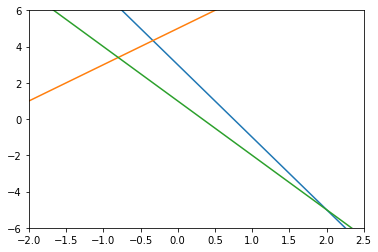

In [16]:
x = np.linspace(-5,5,1000)

y_1 = -4*x + 3
y_2 = 2*x + 5
y_3 = -3*x + 1

plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.show()

In [18]:
matrix = np.array([[4,1],[-2,1],[3,1]])
print(matrix)

[[ 4  1]
 [-2  1]
 [ 3  1]]


In [20]:
matrix_pseud = np.linalg.pinv(matrix)
print(matrix_pseud)

[[ 0.11290323 -0.17741935  0.06451613]
 [ 0.14516129  0.62903226  0.22580645]]


In [21]:
b = np.array([[3],[5],[1]])
print(b)

[[3]
 [5]
 [1]]


In [23]:
result = matrix_pseud.dot(b)
print(result)

[[-0.48387097]
 [ 3.80645161]]


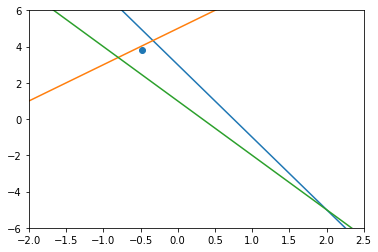

In [24]:
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)

plt.xlim(-2, 2.5)
plt.ylim(-6, 6)

plt.scatter(result[0],result[1])

plt.show()